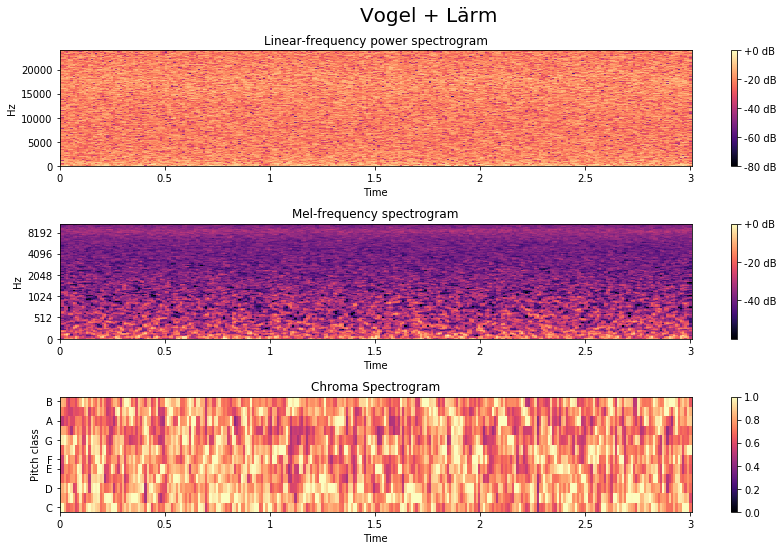

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Laden einer Audio-Datei
file_path = "/Users/timvonfelten/LocalStorage/KlassifizierteDatenSNP/all/stille/ls04_20230723_014500_s_6.wav"
audio, sr = librosa.load(file_path, sr=None)

# Lineares Frequenzspektrogramm
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
D = librosa.stft(audio)  # Kurzzeitspektralanalyse (STFT)
D_magnitude, D_phase = librosa.magphase(D)
librosa.display.specshow(librosa.amplitude_to_db(D_magnitude, ref=np.max),
                         sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Mel-Spektrogramm
plt.subplot(3, 1, 2)
S = librosa.feature.melspectrogram(audio, sr=sr, n_mels=128)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')

# Chroma-Spektrogramm
plt.subplot(3, 1, 3)
C = librosa.feature.chroma_stft(audio, sr=sr)
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.colorbar()
plt.title('Chroma Spectrogram')

# Großer Titel über allen Diagrammen
plt.suptitle('Vogel + Lärm', fontsize=20)

# Layout anpassen, um Platz für den großen Titel zu schaffen
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

